# Reatal cancer

To solve the question: "What's the relationship between the TP53 gene and Reatal cancer when considering the influence of age?"

# 1. Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.READ.sampleMap_READ_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)

In [3]:
clinical_data.head()

,AWG_MLH1_silencing,AWG_cancer_type_Oct62011,CDE_ID_3226963,CIMP,MSI_updated_Oct62011,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,...,_GENOMIC_ID_TCGA_READ_gistic2,_GENOMIC_ID_TCGA_READ_RPPA_RBN,_GENOMIC_ID_data/public/TCGA/READ/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_READ_PDMarray,_GENOMIC_ID_data/public/TCGA/READ/miRNA_GA_gene,_GENOMIC_ID_TCGA_READ_gistic2thd,_GENOMIC_ID_TCGA_READ_exp_GAV2_exon,_GENOMIC_ID_TCGA_READ_mutation_bcm_solid_gene,_GENOMIC_ID_TCGA_READ_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_READ_exp_HiSeqV2_exon
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-AF-2687-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2687-01,COAD-READ,NaN,COADREAD non-CIMP c11,NaN,...,TCGA-AF-2687-01A-02D-1732-01,NaN,TCGA-AF-2687-01,NaN,NaN,TCGA-AF-2687-01A-02D-1732-01,NaN,NaN,c2a39a12-e882-49aa-a5fa-5356e4bcb823,c2a39a12-e882-49aa-a5fa-5356e4bcb823
TCGA-AF-2689-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,COADREAD-like c7,...,TCGA-AF-2689-01A-01D-1549-01,TCGA-AF-2689-01A-21-1932-20,NaN,TCGA-AF-2689-01,TCGA-AF-2689-01,TCGA-AF-2689-01A-01D-1549-01,NaN,TCGA-AF-2689-01A-01W-0831-10,NaN,NaN
TCGA-AF-2689-11,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-11,NaN,C7-COAD/READ,NaN,NaN,...,NaN,NaN,TCGA-AF-2689-11,NaN,NaN,NaN,NaN,NaN,a061d300-0dec-42c6-a21c-13af7bba943d,a061d300-0dec-42c6-a21c-13af7bba943d
TCGA-AF-2690-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2690-01,COAD-READ,NaN,COADREAD non-CIMP c11,COADREAD-like c7,...,TCGA-AF-2690-01A-02D-1732-01,TCGA-AF-2690-01A-11-1932-20,TCGA-AF-2690-01,NaN,NaN,TCGA-AF-2690-01A-02D-1732-01,NaN,NaN,dfcfd7e4-4475-4791-a549-c1778db32ae2,dfcfd7e4-4475-4791-a549-c1778db32ae2
TCGA-AF-2691-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2691-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,NaN,...,TCGA-AF-2691-01A-01D-1549-01,NaN,NaN,TCGA-AF-2691-01,TCGA-AF-2691-01,TCGA-AF-2691-01A-01D-1549-01,a7fa7e33-58e4-4463-b697-61a9c58bf9e1,TCGA-AF-2691-01A-01W-0831-10,NaN,NaN


In [4]:
gene_data.head()

,TCGA-DC-6156-01,TCGA-DC-6160-01,TCGA-EI-6512-01,TCGA-DC-5869-01,TCGA-EI-6507-01,TCGA-AF-3911-01,TCGA-EI-7004-01,TCGA-G5-6572-01,TCGA-EF-5830-01,TCGA-F5-6812-01,...,TCGA-CI-6620-01,TCGA-AG-3725-01,TCGA-AH-6643-01,TCGA-DY-A0XA-01,TCGA-AF-3400-11,TCGA-EI-6506-01,TCGA-AF-2692-11,TCGA-AF-A56K-01,TCGA-DC-6154-01,TCGA-AG-3592-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.335208,0.452908,1.179008,0.163108,0.126508,1.096808,0.552108,0.848808,1.359908,1.343608,...,1.045008,1.399708,0.491908,0.630708,1.540308,1.454808,0.869808,0.855608,1.480208,0.911308
HIF3A,-1.158126,-2.582626,-0.892726,0.122474,-0.709026,-1.862026,-1.704726,1.253474,-1.331526,-0.012826,...,-2.231326,-4.127526,-3.238526,-2.453226,0.209774,-2.553926,2.152274,1.167674,0.547374,-0.467126
RNF17,-0.531035,-0.531035,-0.010835,-0.531035,-0.531035,-0.531035,-0.012135,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,-0.258972,-0.526172,0.336228,-0.787272,0.390328,-0.286072,-0.143072,-0.321872,0.201128,0.697328,...,-0.383672,0.253528,-0.152272,-0.458172,0.361228,-0.265672,0.101328,-0.667272,-0.223772,-0.439072
RNF11,0.037722,-1.281078,-1.008778,-0.677478,-0.478478,-0.849078,-0.265778,-1.116378,-0.650778,-0.207678,...,-1.284078,-0.626878,-0.816678,-1.083878,-0.486878,-0.995878,0.291422,-1.362078,-1.223678,-1.689478


In [5]:
gene_fullname = 'TP53'
gene = 'kras'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Bile Duct Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 130 features, and the gene dataset includes 20530 genes


In [6]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,AWG_MLH1_silencing,AWG_cancer_type_Oct62011,CDE_ID_3226963,CIMP,MSI_updated_Oct62011,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-AF-2687-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2687-01,COAD-READ,NaN,COADREAD non-CIMP c11,NaN,...,0.139722,-1.587117,0.509567,0.85801,0.147323,0.852614,1.095073,-0.155195,1.547767,0.022788
TCGA-AF-2689-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,COADREAD-like c7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AF-2689-11,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-11,NaN,C7-COAD/READ,NaN,NaN,...,0.380022,0.167283,0.671867,-1.28139,-0.766577,1.633314,-0.394927,0.398105,1.410667,0.948188
TCGA-AF-2690-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2690-01,COAD-READ,NaN,COADREAD non-CIMP c11,COADREAD-like c7,...,-0.200178,1.895983,0.825967,-0.33609,-0.037277,1.156814,1.035173,0.081205,3.199267,0.744988
TCGA-AF-2691-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2691-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,AWG_MLH1_silencing,AWG_cancer_type_Oct62011,CDE_ID_3226963,CIMP,MSI_updated_Oct62011,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-AF-2687-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2687-01,COAD-READ,NaN,COADREAD non-CIMP c11,NaN,...,0.139722,-1.587117,0.509567,0.85801,0.147323,0.852614,1.095073,-0.155195,1.547767,0.022788
TCGA-AF-2689-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,COADREAD-like c7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AF-2689-11,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-11,NaN,C7-COAD/READ,NaN,NaN,...,0.380022,0.167283,0.671867,-1.28139,-0.766577,1.633314,-0.394927,0.398105,1.410667,0.948188
TCGA-AF-2690-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2690-01,COAD-READ,NaN,COADREAD non-CIMP c11,COADREAD-like c7,...,-0.200178,1.895983,0.825967,-0.33609,-0.037277,1.156814,1.035173,0.081205,3.199267,0.744988
TCGA-AF-2691-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2691-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,AWG_MLH1_silencing,AWG_cancer_type_Oct62011,CDE_ID_3226963,CIMP,MSI_updated_Oct62011,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bile Duct Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-AF-2687-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2687-01,COAD-READ,NaN,COADREAD non-CIMP c11,NaN,...,-1.587117,0.509567,0.85801,0.147323,0.852614,1.095073,-0.155195,1.547767,0.022788,1
TCGA-AF-2689-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,COADREAD-like c7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
TCGA-AF-2689-11,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-11,NaN,C7-COAD/READ,NaN,NaN,...,0.167283,0.671867,-1.28139,-0.766577,1.633314,-0.394927,0.398105,1.410667,0.948188,0
TCGA-AF-2690-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2690-01,COAD-READ,NaN,COADREAD non-CIMP c11,COADREAD-like c7,...,1.895983,0.825967,-0.33609,-0.037277,1.156814,1.035173,0.081205,3.199267,0.744988,1
TCGA-AF-2691-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2691-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [9]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

# 2. Preliminary analysis

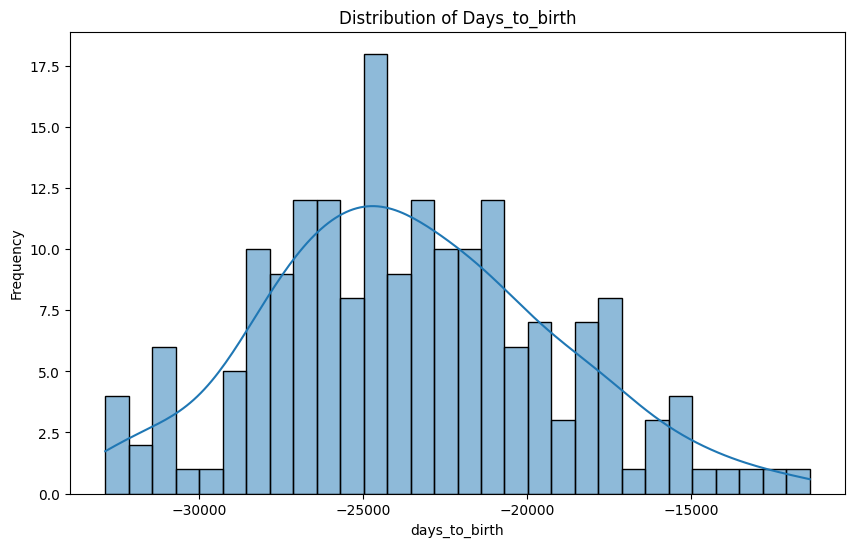

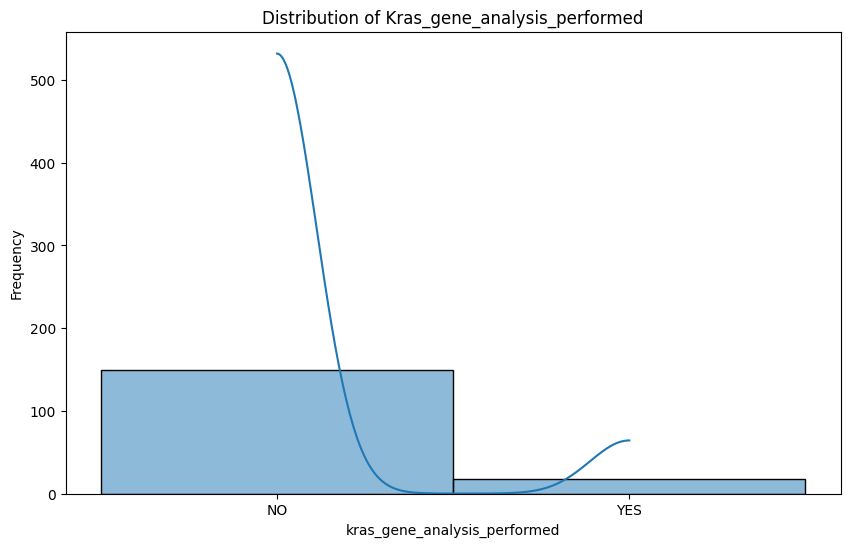

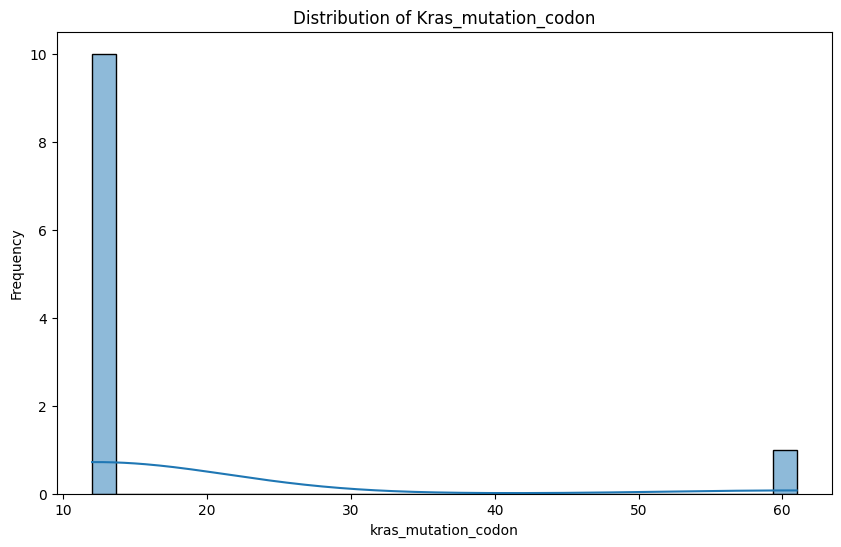

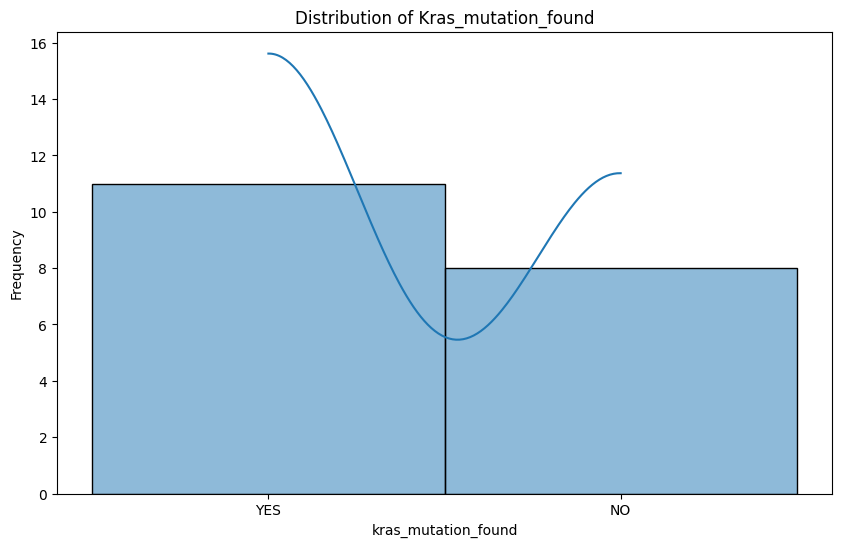

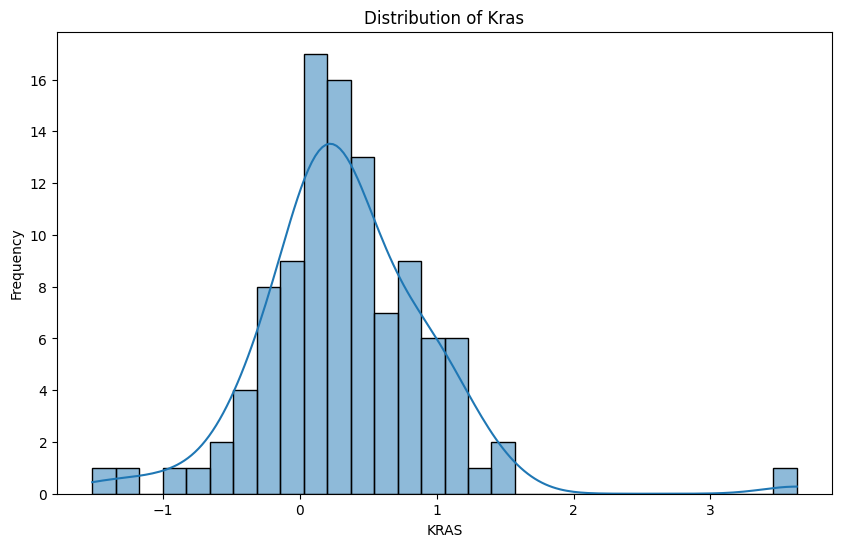

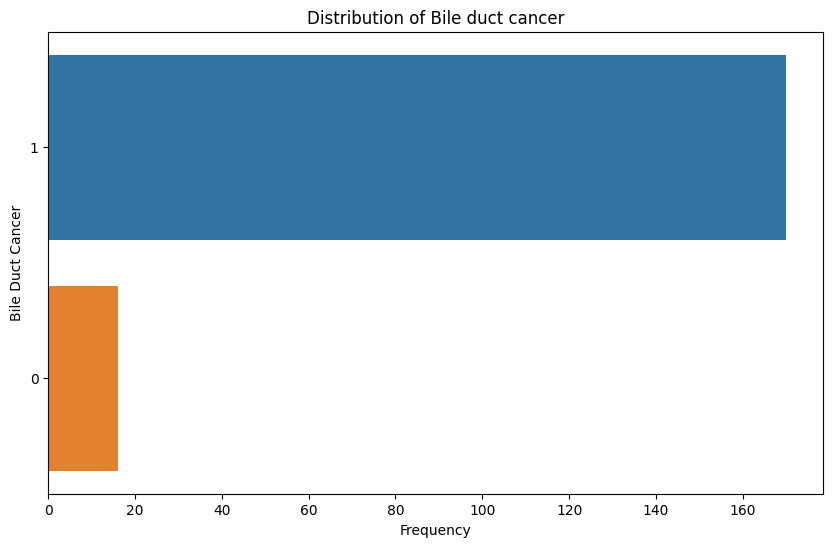

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

In [14]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

# 3. Do regression & Cross Validation

In [15]:
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [16]:
def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

NameError: name 'y' is not defined

# 4. Discussion

In [18]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (TP53): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (TP53): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between TP53 and Bile Duct Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (TP53): There is no significant association between the expression of the TP53 and Bile Duct Cancer when considering the influence of age.

Alternative Hypothesis (TP53): There is an association between the expression of the TP53 and Bile Duct Cancer when considering the influence of age.




In [20]:
def confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"TP53 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"TP53 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Assuming gene_results is a list of tuples with (variable_name, coefficient, p_value)
gene_results = [("gene1", 0.1, 0.03), ("gene2", -0.2, 0.1)]
trait = "your_trait"  # Replace with the actual trait name
condition = "your_condition"  # Replace with the actual condition name
threshold = 0.05

conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: gene1
Conclusion: TP53 is confirmed: There is an association between the expression of the gene1 and your_trait when considering the influence of your_condition.

Variable: gene2
Conclusion: TP53 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the gene2 gene and your_trait when considering the influence of your_condition.


